# Cifar10 classification with and without normalization

In this notebook you will download the cifar10 dataset which contains quite small images (32x32x3) of 10 classes. The data is from the Canadian Institute For Advanced Research. You will plot examples of the images with the class label. Note that because the images are so small it's not always very easy to recoginse which of the ten classes is on the iamge, even as a human. After loading the dataset you will train a Convolutional neural networks to predict the the test dataset. You will train the neural network once with normalized data and once without.


**Dataset:**  You work with the Cifar10 dataset. You have 60'000 32x32 pixel color images of 10 classes ("airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck")

**Content:**
* load the original cifar10 data create a train val and test dataset
* visualize samples of cifar10 dataset
* use keras to train a CNN with the normalized and the unnormalized version of the data
* check if the normalization has an impact on the test performance of the data



#### Imports


In [0]:
# load required libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import optimizers



### Load and plot the data

In the next cell you will load the Cifar10 dataset, 50'000 images are in the training set and 10'000 are in the test dataset. You will use 10'000 for the train and validation dataset.
You will plot one random example of each label and will see
that the images are really small and finally you can convert the lables into the one hot encoding.


In [0]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [20]:
# separate train val and test dataset
X_train=x_train[0:10000] 
Y_train=to_categorical(y_train[0:10000],10) # one-hot encoding

X_val=x_train[20000:30000] 
Y_val=to_categorical(y_train[20000:30000],10)

X_test=x_test 
Y_test=to_categorical(y_test,10)

del x_train, y_train, x_test, y_test


print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(10000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


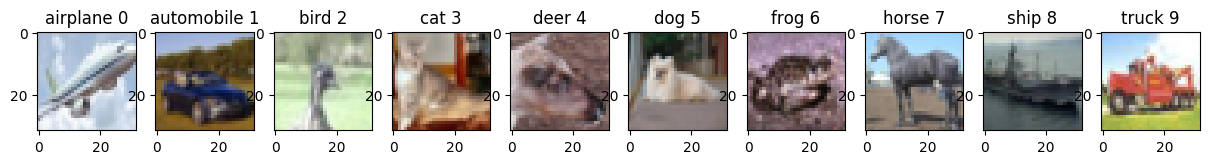

In [21]:
labels=np.array(["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"])
#sample image of each label
plt.figure(figsize=(15,15))
for i in range(0,len(np.unique(np.argmax(Y_train,axis=1)))):
    rmd=np.random.choice(np.where(np.argmax(Y_train,axis=1)==i)[0],1)
    plt.subplot(1,10,i+1)
    img=X_train[rmd]
    plt.imshow(img[0,:,:,:])
    plt.title(labels[i]+" "+np.str(np.argmax(Y_train,axis=1)[rmd][0]))

In [22]:
# check the shape of the data
X_train.shape,Y_train.shape,X_val.shape,Y_val.shape

((10000, 32, 32, 3), (10000, 10), (10000, 32, 32, 3), (10000, 10))

# CNN as classification model for the Cifar10 dataset
Now it's your turn, train two CNNs with the same architecture.
* One CNN should be with the original image data (no normalization)
* One CNN should be with the normalized image data 
* Use the train data to fit the model, the validation to validate the training and the test dataset for the performance estimation on new unseen data.

Use the following hyperparameters 

>the relu activation function  
>kernelsize of 3x3  
>poolingsize of 2x2   
>use 2 convolutional blocks with 8 filters and then a maxpooling layer  followed by again 2 convolutional blocks with 16 filters and then a maxpooling  
> then we flatten the output and use a fully connected layer with 40 nodes and the output has 10 nodes with the softmax activation.

Compare the performance on the testdataest. What do you observe?

### Without normalization

In [0]:
### Your code here ####

batch_size = 128
nb_classes = 10
img_rows, img_cols = 32, 32
kernel_size = (3, 3)
input_shape = (img_rows, img_cols, 3)
pool_size = (2, 2)


model = Sequential()

model.add(Convolution2D(8,kernel_size,padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(8, kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Convolution2D(16, kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(16,kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Flatten())
model.add(Dense(40))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# compile model and intitialize weights
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [24]:
# summarize model along with number of model weights
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 8)         224       
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 8)         584       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 8)         0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 16)        1168      
_________________________________________________________________
activation_14 (Activation)   (None, 16, 16, 16)       

In [25]:
# train the model
history=model.fit(X_train, Y_train, 
                  batch_size=128, 
                  epochs=20,
                  verbose=1, 
                  validation_data=(X_val, Y_val)
                 )

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 1s 113us/sample - loss: 3.0929 - accuracy: 0.0999 - val_loss: 2.3020 - val_accuracy: 0.1002
Epoch 2/20
10000/10000 [==============================] - 1s 62us/sample - loss: 2.2864 - accuracy: 0.1240 - val_loss: 2.2368 - val_accuracy: 0.1525
Epoch 3/20
10000/10000 [==============================] - 1s 64us/sample - loss: 2.2126 - accuracy: 0.1641 - val_loss: 2.1806 - val_accuracy: 0.1706
Epoch 4/20
10000/10000 [==============================] - 1s 63us/sample - loss: 2.1582 - accuracy: 0.1869 - val_loss: 2.1245 - val_accuracy: 0.1985
Epoch 5/20
10000/10000 [==============================] - 1s 63us/sample - loss: 2.0697 - accuracy: 0.2267 - val_loss: 1.9822 - val_accuracy: 0.2448
Epoch 6/20
10000/10000 [==============================] - 1s 62us/sample - loss: 1.8589 - accuracy: 0.2808 - val_loss: 1.8322 - val_accuracy: 0.2804
Epoch 7/20
10000/10000 [==============================]

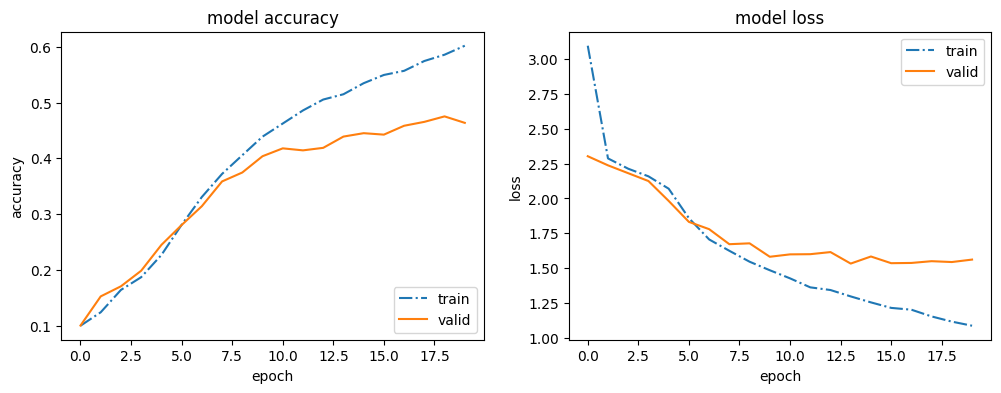

In [26]:
# plot the development of the accuracy and loss during training
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')

In [27]:
pred=model.predict(X_test)
print(confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(pred,axis=1)))
acc = np.sum(np.argmax(Y_test,axis=1)==np.argmax(pred,axis=1))/len(pred)
print("Acc_cnn= " , acc)

[[530  16 118  15  44  35  31  44 137  30]
 [ 39 398   9  30  11   4  65  27  88 329]
 [ 43   0 364 100 156 159  66  81  22   9]
 [  7   6  95 297  72 320  97  71  15  20]
 [ 29   1 223  73 329 135  69 135   5   1]
 [  3   0  82 155  73 519  56  91  15   6]
 [  5   6  65  91 107 131 533  37   6  19]
 [ 15   1  54  97 106 133  33 540   7  14]
 [195  39  34  25   8  24  16  23 575  61]
 [ 64 110  12  57  13  11  52  46  76 559]]
Acc_cnn=  0.4644


### With normalization

We reload the original images and do normalize this time by dividing with 255.

In [28]:

from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# separate train val and test dataset
X_train=x_train[0:10000]/255
Y_train=to_categorical(y_train[0:10000],10) # one-hot encoding

X_val=x_train[20000:30000]/255
Y_val=to_categorical(y_train[20000:30000],10)

X_test=x_test/255 
Y_test=to_categorical(y_test,10)

del x_train, y_train, x_test, y_test


print(X_train_.shape)
print(X_val_.shape)
print(X_test_.shape)

(10000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
### Your code here ####

batch_size = 128
nb_classes = 10
img_rows, img_cols = 32, 32
kernel_size = (3, 3)
input_shape = (img_rows, img_cols, 3)
pool_size = (2, 2)


model = Sequential()

model.add(Convolution2D(8,kernel_size,padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(8, kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Convolution2D(16, kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(16,kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Flatten())
model.add(Dense(40))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# compile model and intitialize weights
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [30]:
# summarize model along with number of model weights
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
activation_18 (Activation)   (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 8)         584       
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 8)         0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 16)        1168      
_________________________________________________________________
activation_20 (Activation)   (None, 16, 16, 16)       

In [31]:
# train the model
history=model.fit(X_train, Y_train, 
                  batch_size=128, 
                  epochs=20,
                  verbose=1, 
                  validation_data=(X_val, Y_val)
                 )

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 1s 148us/sample - loss: 2.1289 - accuracy: 0.2106 - val_loss: 1.8784 - val_accuracy: 0.3282
Epoch 2/20
10000/10000 [==============================] - 1s 80us/sample - loss: 1.7780 - accuracy: 0.3577 - val_loss: 1.6885 - val_accuracy: 0.3921
Epoch 3/20
10000/10000 [==============================] - 1s 81us/sample - loss: 1.6063 - accuracy: 0.4252 - val_loss: 1.5624 - val_accuracy: 0.4439
Epoch 4/20
10000/10000 [==============================] - 1s 78us/sample - loss: 1.5062 - accuracy: 0.4643 - val_loss: 1.5429 - val_accuracy: 0.4477
Epoch 5/20
10000/10000 [==============================] - 1s 79us/sample - loss: 1.4383 - accuracy: 0.4827 - val_loss: 1.4395 - val_accuracy: 0.4894
Epoch 6/20
10000/10000 [==============================] - 1s 78us/sample - loss: 1.3966 - accuracy: 0.5016 - val_loss: 1.4146 - val_accuracy: 0.4960
Epoch 7/20
10000/10000 [==============================]

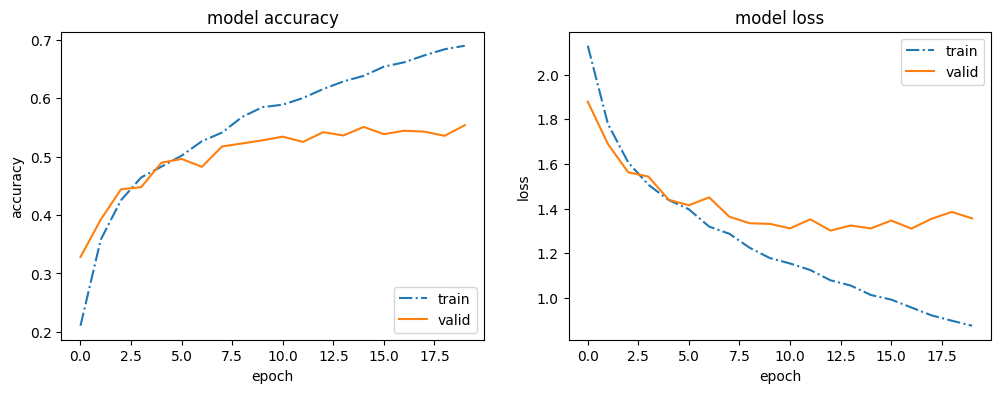

In [32]:
# plot the development of the accuracy and loss during training
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')

In [33]:
pred=model.predict(X_test)
print(confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(pred,axis=1)))
acc = np.sum(np.argmax(Y_test,axis=1)==np.argmax(pred,axis=1))/len(pred)
print("Acc_cnn= " , acc)

[[730  35  29  21  10  16  16   8  91  44]
 [ 46 700   8  13   0   6  14   5  69 139]
 [145  19 304  83 118 125 126  40  18  22]
 [ 54  26  64 380  53 196 132  46  17  32]
 [ 79  16  82  85 380  71 172  82  12  21]
 [ 33  10  46 194  41 487  74  71  22  22]
 [ 23  29  36  90  33  43 706   5  15  20]
 [ 45  12  19  74  58 120  26 576  12  58]
 [172  81   8  13   3  20   8   9 643  43]
 [ 61 170   9  21   9  17  15  26  66 606]]
Acc_cnn=  0.5512
